# CLEANING AND ADDING COLUMNS

imports

In [1]:
import pandas as pd
df = pd.read_excel('vaccine_data.xlsx')
drop = ['Note','ReNa','P1Com','P2Com','P3Com','CeNa','CePa','CeCo']
df.drop(columns=drop, inplace=True)

convert "Attended" columns to datetime and make sure "NO SHOW" columns do not have NaT

In [2]:
df['Att1'] = pd.to_datetime(df['Att1'], errors='coerce')
df['Att2'] = pd.to_datetime(df['Att2'], errors='coerce')
df['Att3'] = pd.to_datetime(df['Att3'], errors='coerce')
df['Att4'] = pd.to_datetime(df['Att4'], errors='coerce')
df['Att5'] = pd.to_datetime(df['Att5'], errors='coerce')
df['ReDB'] = pd.to_datetime(df['ReDB'], errors='coerce')
df['CeDB'] = pd.to_datetime(df['CeDB'], errors='coerce')
for idx, row in df.iterrows():
    if row['ReNu'] == 'NO SHOW':
        df.at[idx, 'Att1'] = 'NO SHOW'
        df.at[idx, 'Att2'] = 'NO SHOW'
        df.at[idx, 'Att3'] = 'NO SHOW'
        df.at[idx, 'Att4'] = 'NO SHOW'
        df.at[idx, 'Att5'] = 'NO SHOW'
        df.at[idx, 'ReDB'] = 'NO SHOW'
df['Att1'].fillna('None', inplace=True)
df['Att2'].fillna('None', inplace=True)
df['Att3'].fillna('None', inplace=True)
df['Att4'].fillna('None', inplace=True)
df['Att5'].fillna('None', inplace=True)


make one DOB column

In [3]:
DOBs = []
for idx, row in df.iterrows():
    if df.at[idx, 'ReDB'] != 'NO SHOW':
        date = df.at[idx, 'ReDB']
        DOBs.append(date)
    else:
        date = df.at[idx, 'CeDB']
        DOBs.append(date)
df['DOB'] = DOBs


age column

In [4]:
dates = []

for idx, row in df.iterrows():
    if row['Att1'] == 'NO SHOW':
        dates.append(pd.to_datetime('3/15/2023'))
        continue
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        dates.append(pd.to_datetime('3/15/2023'))
        continue
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        dates.append(pd.to_datetime('4/15/2023'))
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        dates.append(pd.to_datetime('5/15/2023'))
        continue
    if row['Att4'] == pd.to_datetime('6/15/2023'):
        dates.append(pd.to_datetime('6/15/2023'))
        continue
    if row['Att5'] == pd.to_datetime('7/15/2023'):
        dates.append(pd.to_datetime('7/15/2023'))
        continue

df['dates'] = dates
ages = list(df['dates'] - df['DOB'])
df['AGE'] = ages
df['AGE'] = df['AGE'].dt.days / 30
df.drop(columns=['dates'], inplace=True)

PreV column

In [5]:
preV_P = []
for idx, row in df.iterrows():
    if row['ReNu'] == 'NO SHOW':
        preV_P.append('?')
        continue
    count = 0
    for col in df.columns:
        if row[col] == 'P':
            count = count + 1
    if count >= 1:
        preV_P.append('Yes')
    else:
        preV_P.append('No')
df['PreV'] = preV_P

UTD column

In [6]:
penta_cols = ['P1Pe3','P2Pe3','P3Pe3','P4Pe3', 'P5Pe3']
polio_cols = ['P1Po3','P2Po3','P3Po3','P4Po3', 'P5Po3']
utd = []
for idx, row in df.iterrows():
    if row['ReNu'] == 'NO SHOW':
        utd.append('?')
        continue
    UTD_Pe = False
    UTD_Po = False
    while not UTD_Pe and not UTD_Po:
        for col in penta_cols:
            if row[col] == 'Yes' or row[col] == 'P':
                UTD_Pe = True
        for col2 in polio_cols:
            if row[col2] == 'Yes' or row[col2] == 'P':
                UTD_Po = True
        utd.append(UTD_Pe and UTD_Po)
        if not UTD_Pe and not UTD_Po:
            break
df['UTD'] = utd

drop unneeded columns

In [7]:
df.drop(columns=['ReDB','CeDB','CeAg','ReSe'], inplace=True)

insert "-" if the child did not attend on that date

In [8]:
for idx, row in df.iterrows():
    if row['Att1'] == 'None': # first came in Apr/May/June
        #print(7)
        df.at[idx, 'P1BC'] = '-'
        df.at[idx, 'P1Po1'] = '-'
        df.at[idx, 'P1Po2'] = '-'
        df.at[idx, 'P1Po3'] = '-'
        df.at[idx, 'P1Pe1'] = '-'
        df.at[idx, 'P1Pe2'] = '-'
        df.at[idx, 'P1Pe3'] = '-'
        df.at[idx, 'P1M1'] = '-'
        df.at[idx, 'P1M2'] = '-'
    if (row['Att2'] == 'None') and (row['Att1'] == 'None'): # first came in May/June
        df.at[idx, 'P2BC'] = '-'
        df.at[idx, 'P2Po1'] = '-'
        df.at[idx, 'P2Po2'] = '-'
        df.at[idx, 'P2Po3'] = '-'
        df.at[idx, 'P2Pe1'] = '-'
        df.at[idx, 'P2Pe2'] = '-'
        df.at[idx, 'P2Pe3'] = '-'
        df.at[idx, 'P2M1'] = '-'
        df.at[idx, 'P2M2'] = '-'
    if (row['Att3'] == 'None') and (row['Att1'] == 'None') and (row['Att2'] == 'None'): # first came in June
        df.at[idx, 'P3BC'] = '-'
        df.at[idx, 'P3Po1'] = '-'
        df.at[idx, 'P3Po2'] = '-'
        df.at[idx, 'P3Po3'] = '-'
        df.at[idx, 'P3Pe1'] = '-'
        df.at[idx, 'P3Pe2'] = '-'
        df.at[idx, 'P3Pe3'] = '-'
        df.at[idx, 'P3M1'] = '-'
        df.at[idx, 'P3M2'] = '-'
    if (row['Att4'] == 'None' ) and (row['Att3'] == 'None') and (row['Att1'] == 'None') and (row['Att2'] == 'None'): # first came in July
        df.at[idx, 'P4BC'] = '-'
        df.at[idx, 'P4Po1'] = '-'
        df.at[idx, 'P4Po2'] = '-'
        df.at[idx, 'P4Po3'] = '-'
        df.at[idx, 'P4Pe1'] = '-'
        df.at[idx, 'P4Pe2'] = '-'
        df.at[idx, 'P4Pe3'] = '-'
        df.at[idx, 'P4M1'] = '-'
        df.at[idx, 'P4M2'] = '-'

In [9]:
df['UTD'] = df['UTD'].replace(True,'Yes')
df['UTD'] = df['UTD'].replace(False, 'No')

Age columns for not previously vaccinated children

In [10]:
age_apr15 = []
for idx, row in df.iterrows():
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        age_apr15.append(row['AGE'] + 1)
        continue
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        age_apr15.append(row['AGE'])
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        age_apr15.append(row['AGE'] - 1)
        continue
    else:
        age_apr15.append(row['AGE'] - 2)
age_may15 = []
for idx, row in df.iterrows():
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        age_may15.append(row['AGE'] + 2)
        continue
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        age_may15.append(row['AGE'] + 1)
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        age_may15.append(row['AGE'])
        continue
    else:
        age_may15.append(row['AGE'] - 1)
age_june15 = []
for idx, row in df.iterrows():
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        age_june15.append(row['AGE'] + 3)
        continue
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        age_june15.append(row['AGE'] + 2)
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        age_june15.append(row['AGE'] + 1)
        continue
    else:
        age_june15.append(row['AGE'])
age_july15 = []
for idx, row in df.iterrows():
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        age_july15.append(row['AGE'] + 4)
        continue
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        age_july15.append(row['AGE'] + 3)
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        age_july15.append(row['AGE'] + 2)
        continue
    if row['Att4'] == pd.to_datetime('6/15/2023'):
        age_july15.append(row['AGE']+ 1)
    else:
        age_july15.append(row['AGE'])

df['AGE_APR15'] = age_apr15
df['AGE_MAY15'] = age_may15
df['AGE_JUNE15'] = age_june15
df['AGE_JULY15'] = age_july15


replace value

In [11]:
df.at[164, 'CeNu'] = 'None'

# ANALYSIS

### FLOWCHART (Mar/Apr)

In [13]:
flow_df = df.loc[df['ReNu'] != 'NO SHOW', :]  # 183
# census = flow_df.loc[flow_df['CeNu'] != 'None', :]  # 131
# new_attendees = flow_df.loc[flow_df['CeNu'] == 'None', :]  # 52
# at_least_once = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (df['CeNu'] != 'None'), :]  # 77
# never_came = flow_df.loc[(flow_df['ReNu'] == 'NO SHOW') & (df['CeNu'] != 'None'), :]  # 54
# no_prev = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (df['PreV'] == 'No'), :]
# prev = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'Yes'), :]  # 15
# bcg_eligible = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['AGE'] <= 12), :]
# bcg1 = flow_df.loc[
#        (flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['AGE'] <= 12) & (flow_df['P4BC'] == 'Yes'),
#        :]
# pe_eligible = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['AGE'] <= 36), :]  # 114
# pe1 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Pe1'] == 'Yes'), :]  # 111
# pe2 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Pe2'] == 'Yes'), :]  # 102
# pe3 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Pe3'] == 'Yes'), :]  # 86
# po1 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Po1'] == 'Yes'), :]
# po2 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Po2'] == 'Yes'), :]
# po3 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Po3'] == 'Yes'), :]
# mmr1 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4M1'] == 'Yes'), :]
# mmr2 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4M2'] == 'Yes'), :]
# prev_utd = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'Yes') & (flow_df['UTD'] == True), :]  # 12
# may = flow_df.loc[((flow_df['Att3'] != 'None') & (flow_df['Att3'] != 'NO SHOW')), :]  # 86
# june = flow_df.loc[((flow_df['Att4'] != 'None') & (flow_df['Att4'] != 'NO SHOW')), :]  # 102
# census = df.loc[df['CeNu'] != 'None', :]
# census.loc[((census['Att1'] == 'NO SHOW') & (census['Att2'] == 'NO SHOW') & (census['Att3'] == 'NO SHOW')),:]
# v = no_prev.loc[((no_prev['Att1'] == pd.to_datetime('3/15/2023') )|(no_prev['Att2']==pd.to_datetime('4/15/2023') )|(no_prev['Att3']==pd.to_datetime('5/15/2023'))),:]
# v.loc[(v['AGE_JUNE15']>=9)&(v['P5M2']=='Yes'),:]
# no_prev.loc[(no_prev['UTD'] == 'Yes')&(no_prev['P5M2']=='Yes'), :]
# flow_df.loc[(flow_df['PreV']=='Yes')&(flow_df['UTD']=='Yes')&((flow_df['P5BC']=='P')|(flow_df['P5BC']=='Yes')), :] # 33
# flow_df.loc[(flow_df['PreV']=='No')&(flow_df['UTD']=='Yes')&(flow_df['P5BC']=='Yes'), :]

### Camp analysis

In [ ]:
num_attendees = []
num_nonattendees = []
camp_names = []
for camp_name in df['CAMP'].unique():
    amount1 = len(df.loc[ (df['CAMP'] == camp_name) & (df['PreV'] == '?'), :]) # did not attend
    amount2 = len(df.loc[ (df['CAMP'] == camp_name) & (df['PreV'] != '?'), :]) # attended
    num_nonattendees.append(amount1)
    num_attendees.append(amount2)
    camp_names.append(camp_name)

camp_dict = {'Camp Name': camp_names, 'Attended': num_attendees, 'Did not attend': num_nonattendees }

camp_df = pd.DataFrame(camp_dict)
camp_df['Total'] = camp_df['Attended'] + camp_df['Did not attend']
#totals = {'Camp Name':'Total', 'Attended': sum(camp_df['Attended']), 'Did not attend': sum(camp_df['Did not attend']), 'Total': sum(camp_df['Attended']) + sum(camp_df['Did not attend'])}
#camp_df = camp_df.append(totals, ignore_index=True)
camp_df['Percentage'] = (camp_df['Total'] / sum(camp_df['Total'])) * 100
camp_df

## Survival Analysis, previously unvaccinated children

In [12]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt
import numpy as np

Create array of Pe3 status and number of months to get Pe3, or time until last contact for dropouts.
Only include children >= 2 months old at date of first attendance and attended in at least one of March/April/May.

In [29]:
no_prev = df.loc[(df['PreV']=='No')&(df['AGE']>=2), :]
df2 = no_prev.loc[(no_prev['Att1'] != 'None')|(no_prev['Att2'] != 'None')|(no_prev['Att3']!='None'),:]
pe3_status = []
pe3_time = []
for idx, row in df2.iterrows():
    if row['Att1'] != 'None': # first attended in March
        if row['P3Pe3'] == 'Yes': # received Pe3 after 2 months since first visit
            pe3_status.append(True) 
            pe3_time.append(2)
            continue
        if row['P4Pe3'] == 'Yes':  # received Pe3 after 3 months since first visit
            pe3_status.append(True)
            pe3_time.append(3)
            continue
        if row['P5Pe3'] == 'Yes': # received Pe3 after 4 months since first visit
            pe3_status.append(True)
            pe3_time.append(4)
            continue
        else: # calculate time until last contact
            pe3_status.append(False)
            if (row['Att2'] == 'None') & (row['Att3'] == 'None') & (row['Att4']=='None')&(row['Att5']=='None'): # left after March
                pe3_time.append(0)
            elif (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                pe3_time.append(1)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                pe3_time.append(2)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                pe3_time.append(3)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                pe3_time.append(4)

    elif (row['Att2'] != 'None')&(row['Att1']=='None'): # first attended in April
        if row['P4Pe3'] == 'Yes':
            pe3_status.append(True)
            pe3_time.append(2)
            continue
        if row['P5Pe3'] == 'Yes':
            pe3_status.append(True)
            pe3_time.append(3)
            continue
        else: # calculate time until last contact
            pe3_status.append(False)
            if (row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                pe3_time.append(0)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                pe3_time.append(1)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                pe3_time.append(2)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                pe3_time.append(3)
    elif (row['Att2'] == 'None')&(row['Att1']=='None')&(row['Att3']!='None'): # first attended in May
        if row['P5Pe3'] == 'Yes':
            pe3_status.append(True)
            pe3_time.append(2)
            continue
        else: # calculate time until last contact
            pe3_status.append(False)
            if (row['Att4']=='None')&(row['Att5']=='None'): # left after May
                pe3_time.append(0)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                pe3_time.append(1)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                pe3_time.append(2)


Create array of Po3 status and number of months to get Po3, or time until last contact for dropouts.
Only include children >= 2 months old at date of first attendance and attended in at least one of March/April/May.

In [14]:
po3_status = []
po3_time = []
for idx, row in df2.iterrows():
    if row['Att1'] != 'None': # first attended in March
        if row['P3Po3'] == 'Yes': # received Po3 after 2 months since first visit
            po3_status.append(True) 
            po3_time.append(2)
            continue
        if row['P4Po3'] == 'Yes':  # received Po3 after 3 months since first visit
            po3_status.append(True)
            po3_time.append(3)
            continue
        if row['P5Po3'] == 'Yes': # received Po3 after 4 months since first visit
            po3_status.append(True)
            po3_time.append(4)
            continue
        else: # calculate time until last contact
            po3_status.append(False)
            if (row['Att2'] == 'None') & (row['Att3'] == 'None') & (row['Att4']=='None')&(row['Att5']=='None'): # left after March
                po3_time.append(0)
            elif (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                po3_time.append(1)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                po3_time.append(2)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                po3_time.append(3)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                po3_time.append(4)

    elif (row['Att2'] != 'None')&(row['Att1']=='None'): # first attended in April
        if row['P4Po3'] == 'Yes':
            po3_status.append(True)
            po3_time.append(2)
            continue
        if row['P5Po3'] == 'Yes':
            po3_status.append(True)
            po3_time.append(3)
            continue
        else: # calculate time until last contact
            po3_status.append(False)
            if (row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                po3_time.append(0)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                po3_time.append(1)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                po3_time.append(2)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                po3_time.append(3)
    elif (row['Att2'] == 'None')&(row['Att1']=='None')&(row['Att3']!='None'): # first attended in May
        if row['P5Po3'] == 'Yes':
            po3_status.append(True)
            po3_time.append(2)
            continue
        else: # calculate time until last contact
            po3_status.append(False)
            if (row['Att4']=='None')&(row['Att5']=='None'): # left after May
                po3_time.append(0)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                po3_time.append(1)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                po3_time.append(2)

Create array of M2 status and number of months to get M2, or time until last contact for dropouts.
Only include children >= 9 months old at date of first attendance and attended in at least one of March/April/May/June.

In [83]:
of_age = df.loc[(df['PreV']=='No')&(df['AGE']>=9), :]
df3 = of_age.loc[(of_age['Att1'] != 'None')|(of_age['Att2'] != 'None')|(of_age['Att3']!='None')|(of_age['Att4']!='None'),:]
mmr_status = []
mmr_time = []
for idx, row in df3.iterrows():
    if row['Att1'] != 'None': # first attended in March
        if row['P2M2'] == 'Yes': # received M2 after 1 month since first visit
            mmr_status.append(True) 
            mmr_time.append(1)
            continue
        if row['P3M2'] == 'Yes':  # received M2 after 2 months since first visit
            mmr_status.append(True)
            mmr_time.append(2)
            continue
        if row['P4M2'] == 'Yes': # received M2 after 3 months since first visit
            mmr_status.append(True)
            mmr_time.append(3)
            continue
        if row['P5M2'] == 'Yes': # received M2 after 4 months since first visit
            mmr_status.append(True)
            mmr_time.append(4)
            continue
        else: # calculate time until last contact
            mmr_status.append(False)
            if (row['Att2'] == 'None') & (row['Att3'] == 'None') & (row['Att4']=='None')&(row['Att5']=='None'): # left after March
                mmr_time.append(0)
            elif (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                mmr_time.append(1)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                mmr_time.append(2)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                mmr_time.append(3)
            elif row['Att5']!='None': # no M2 by the end of the program
                mmr_time.append(4)
    elif row['Att2'] != 'None': # first attended in April
        if row['P3M2'] == 'Yes': # received M2 after 1 month since first visit
            mmr_status.append(True) 
            mmr_time.append(1)
            continue
        if row['P4M2'] == 'Yes':  # received M2 after 2 months since first visit
            mmr_status.append(True)
            mmr_time.append(2)
            continue
        if row['P5M2'] == 'Yes': # received M2 after 3 months since first visit
            mmr_status.append(True)
            mmr_time.append(3)
            continue
        else: # calculate time until last contact
            mmr_status.append(False)
            if (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                mmr_time.append(0)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                mmr_time.append(1)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                mmr_time.append(2)
            elif row['Att5']!='None': # no M2 by the end of the program
                mmr_time.append(3)
    elif row['Att3'] != 'None': # first attended in May
        if row['P4M2'] == 'Yes': # received M2 after 1 month since first visit
            mmr_status.append(True) 
            mmr_time.append(1)
            continue
        if row['P5M2'] == 'Yes':  # received M2 after 2 months since first visit
            mmr_status.append(True)
            mmr_time.append(2)
            continue
        else: # calculate time until last contact
            mmr_status.append(False)
            if (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                mmr_time.append(0)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                mmr_time.append(1)
            elif row['Att5']!='None': # no M2 by the end of the program
                mmr_time.append(2)
    elif row['Att4'] != 'None': # first attended in June
        if row['P5M2'] == 'Yes': # received M2 after 1 month since first visit
            mmr_status.append(True) 
            mmr_time.append(1)
            continue
        else: # calculate time until last contact
            mmr_status.append(False)
            if (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                mmr_time.append(0)
            elif row['Att5']!='None': # no M2 by the end of the program
                mmr_time.append(1)

36

Create array of BCG status and number of months to get Pe3, or time until last contact for dropouts.
Only include children <= 12 months old at date of first attendance and attended at least once

In [91]:
bcg = df.loc[(df['PreV']=='No')&(df['AGE']<=12), :]
bcg_status = []
bcg_time = []
for idx, row in bcg.iterrows():
    if row['Att1'] != 'None': # first attended in March
        if row['P1BC'] == 'Yes': # received BCG after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
            continue
        if row['P2BC'] == 'Yes':  # received BCG after 1 months since first visit
            bcg_status.append(True)
            bcg_time.append(1)
            continue
        if row['P3BC'] == 'Yes': # received BCG after 2 months since first visit
            bcg_status.append(True)
            bcg_time.append(2)
            continue
        if row['P4BC'] == 'Yes': # received BCG after 3 months since first visit
            bcg_status.append(True)
            bcg_time.append(3)
            continue
        if row['P5BC'] == 'Yes': # received BCG after 4 months since first visit
            bcg_status.append(True)
            bcg_time.append(4)
            continue
        else: # calculate time until last contact
            bcg_status.append(False)
            if (row['Att2'] == 'None') & (row['Att3'] == 'None') & (row['Att4']=='None')&(row['Att5']=='None'): # left after March
                bcg_time.append(0)
            elif (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                bcg_time.append(1)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                bcg_time.append(2)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                bcg_time.append(3)
            elif row['Att5']!='None': # no BCG by the end of the program
                bcg_time.append(4)
    elif row['Att2'] != 'None': # first attended in April
        if row['P2BC'] == 'Yes': # received BC after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
            continue
        if row['P3BC'] == 'Yes':  # received BC after 1 month since first visit
            bcg_status.append(True)
            bcg_time.append(1)
            continue
        if row['P4BC'] == 'Yes': # received BC after 2 months since first visit
            bcg_status.append(True)
            bcg_time.append(2)
            continue
        if row['P5BC'] == 'Yes': # received BC after 3 months since first visit
            bcg_status.append(True)
            bcg_time.append(3)
            continue
        else: # calculate time until last contact
            bcg_status.append(False)
            if (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                bcg_time.append(0)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                bcg_time.append(1)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                bcg_time.append(2)
            elif row['Att5']!='None': # no BC by the end of the program
                bcg_time.append(3)
    elif row['Att3'] != 'None': # first attended in May
        if row['P3BC'] == 'Yes': # received BC after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
            continue
        if row['P4BC'] == 'Yes':  # received BC after 1 month since first visit
            bcg_status.append(True)
            bcg_time.append(1)
            continue
        if row['P5BC'] == 'Yes':  # received BC after 2 months since first visit
            bcg_status.append(True)
            bcg_time.append(2)
            continue
        else: # calculate time until last contact
            bcg_status.append(False)
            if (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                bcg_time.append(0)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                bcg_time.append(1)
            elif row['Att5']!='None': # no M2 by the end of the program
                bcg_time.append(2)
    elif row['Att4'] != 'None': # first attended in June
        if row['P4BC'] == 'Yes': # received BC after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
            continue
        if row['P5BC'] == 'Yes': # received BC after 1 month since first visit
            bcg_status.append(True) 
            bcg_time.append(1)
            continue
        else: # calculate time until last contact
            bcg_status.append(False)
            if (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                bcg_time.append(0)
            elif row['Att5']!='None': # no M2 by the end of the program
                bcg_time.append(1)
    elif row['Att5'] != 'None': # first attended in July
        if row['P5BC'] == 'Yes': # received BC after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
        else:
            bcg_status.append(False) 
            bcg_time.append(0)
            

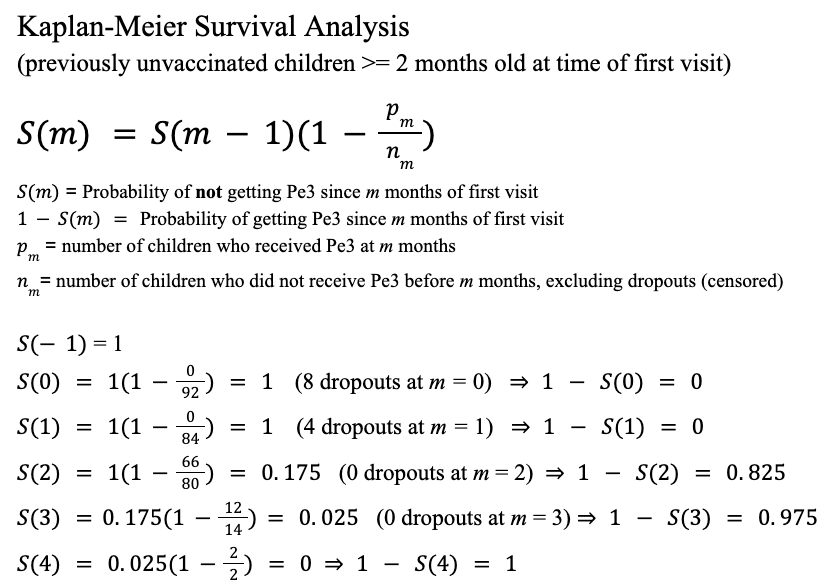

Kaplan-Meier curve with censoring

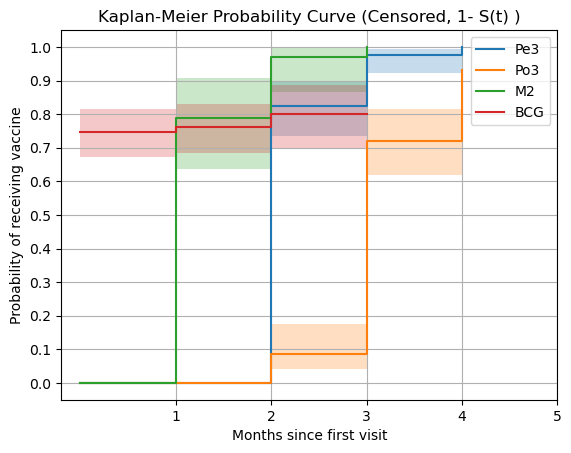

In [130]:
time, prob, ci = kaplan_meier_estimator(event=pe3_status, time_exit=pe3_time, conf_type="log-log")
time2, prob2, ci2 = kaplan_meier_estimator(event=po3_status, time_exit=po3_time, conf_type="log-log")
time3, prob3, ci3 = kaplan_meier_estimator(event=mmr_status, time_exit=mmr_time, conf_type="log-log")
time4, prob4, ci4 = kaplan_meier_estimator(event=bcg_status, time_exit=bcg_time, conf_type="log-log")

plt.step(time, (1-prob), where='post', label='Pe3')
plt.step(time2, (1-prob2), where='post', label='Po3')
plt.step(time3, (1-prob3), where='post', label='M2')
plt.step(time4, (1-prob4), where='post', label='BCG')

plt.fill_between(time, (1-ci[1]), (1-ci[0]), alpha=0.25, step="post")
plt.fill_between(time2, (1-ci2[1]), (1-ci2[0]), alpha=0.25, step="post")
plt.fill_between(time3, (1-ci3[1]), (1-ci3[0]), alpha=0.25, step="post")
plt.fill_between(time4, (1-ci4[1]), (1-ci4[0]), alpha=0.25, step="post")

plt.xlabel('Months since first visit')
plt.ylabel('Probability of receiving vaccine')
plt.xticks(range(1, 6))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Kaplan-Meier Probability Curve (Censored, 1- S(t) )')
plt.legend()
plt.grid()
plt.show()

Function to calculate survival probabilities

In [88]:
def calculate_probabilities(event, time_exit, reverse=False):
    """Calculate survival probabilties for a status array and a time array.
    Set reverse to true to calculate 1- S(t)."""
    z = list(zip(event, time_exit))
    p0 = 0
    p1 = 0
    p2 = 0
    p3 = 0
    p4 = 0
    for item in z:
        if item == (True, 0):
            p0 = p0 + 1
        if item == (True, 1):
            p1 = p1 + 1
        if item == (True, 2):
            p2 = p2 + 1
        if item == (True, 3):
            p3 = p3 + 1
        if item == (True, 4):
            p4 = p4 + 1
    n0 = len(event)
    n1 = n0 - p0
    n2 = n1 - p1
    n3 = n2 - p2 
    n4 = n3 - p3
    s0 = 1*(1-(p0/n0))
    s1 = s0*(1-(p1/n1))
    s2 = s1*(1-(p2/n2))
    s3 = s2*(1-(p3/n3))
    s4 = s3*(1-(p4/n4))
    if reverse:
        return [0,1,2,3,4], [(1-s0), (1-s1), (1-s2), (1-s3), (1-s4)]
    if not reverse:
        return [0,1,2,3,4], [s0, s1, s2, s3, s4]
    


Function to calculate confidence intervals

In [89]:
import math
import numpy as np
def calculate_CI(status, time, reverse=False):
    n = len(status)
    times, probs = calculate_probabilities(event=status, time_exit=time, reverse=reverse)
    CIs = []
    for t in range(5):
        stdev_st = np.sqrt((probs[t]/n)*(1-probs[t]))
        lower = probs[t] - 1.96*stdev_st
        upper = probs[t] + 1.96*stdev_st
        CIs.append((lower, upper))
    return np.array(CIs) 
    

plot probabilities with confidence intervals

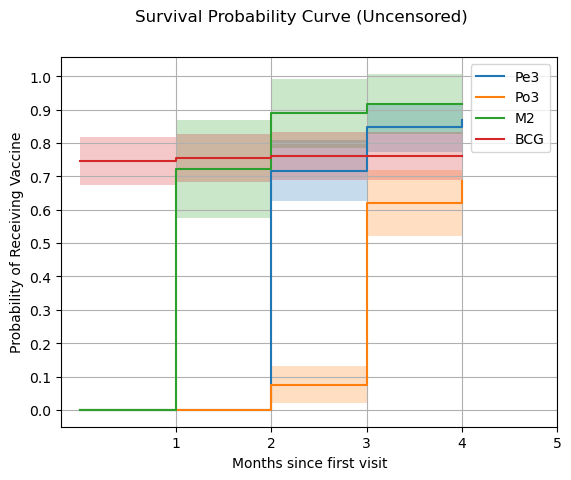

In [125]:
times, probs = calculate_probabilities(event=pe3_status, time_exit=pe3_time, reverse=True) 
times2, probs2 = calculate_probabilities(event=po3_status, time_exit=po3_time, reverse=True) 
times3, probs3 = calculate_probabilities(event=mmr_status, time_exit=mmr_time, reverse=True) 
times4, probs4 = calculate_probabilities(event=bcg_status, time_exit=bcg_time, reverse=True) 

ci = calculate_CI(status=pe3_status, time=pe3_time, reverse=True)
ci2 = calculate_CI(status=po3_status, time=po3_time, reverse=True)
ci3 = calculate_CI(status=mmr_status, time=mmr_time, reverse=True)
ci4 = calculate_CI(status=bcg_status, time=bcg_time, reverse=True)

plt.step(times, probs, where='post', label='Pe3')
plt.step(times2, probs2, where='post', label='Po3')
plt.step(times3, probs3, where='post', label='M2')
plt.step(times4, probs4, where='post', label='BCG')

plt.fill_between(x=times, y1 = ci[:,0], y2 = ci[:,1], step='post',alpha=0.25)
plt.fill_between(x=times2,y1 = ci2[:,0], y2 = ci2[:,1], step='post',alpha=0.25)
plt.fill_between(x=times3,y1 = ci3[:,0], y2 = ci3[:,1], step='post',alpha=0.25)
plt.fill_between(x=times4,y1 = ci4[:,0], y2 = ci4[:,1], step='post',alpha=0.25)

plt.xlabel('Months since first visit')
plt.ylabel('Probability of Receiving Vaccine')
plt.xticks(range(1, 6))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.suptitle('Survival Probability Curve (Uncensored)')
plt.grid()
plt.legend()
plt.show()